# **Analisis Sentimen Review Aplikasi Alfagift di Google Playstore**

Dalam proyek ini, kita akan melakukan analisis sentimen terhadap ulasan pengguna aplikasi Alfagift yang tersedia di Google Play Store. Alfagift merupakan aplikasi belanja dan loyalty program resmi dari Alfamart yang memungkinkan pengguna untuk berbelanja secara online, mengumpulkan poin, serta menikmati berbagai promo dan penawaran eksklusif.

Dengan menganalisis ulasan pengguna, kita dapat memahami persepsi mereka terhadap kualitas layanan, kemudahan penggunaan aplikasi, serta kepuasan secara keseluruhan. Proses ini melibatkan pengumpulan data ulasan, pra-pemrosesan teks, dan penerapan algoritma machine learning untuk mengklasifikasikan sentimen menjadi positif, negatif, atau netral.

# **Import Library**

Pertama, kita perlu mengimpor library yang dibutuhkan.

In [ ]:
# memanipulasi data (membaca dan memproses data)
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

seed = 0
np.random.seed(seed)

# membuat grafik (chart bar, histogram, dan heatmap)
import matplotlib.pyplot as plt
import seaborn as sns

# membersihkan data dari tanggal, simbol, dan karakter khusus
import datetime as dt
import re
import string

# memecah kalimat menjadi sebuah kata
from nltk.tokenize import word_tokenize

# mengapus kata umum yang tidak relevan (seperti "yang", "dan", dsb)
from nltk.corpus import stopwords

# menampilkan kata-kata yang sering muncul dalam bentuk visual yang menarik.
from wordcloud import WordCloud

In [ ]:
# digunakan untuk imbuhan dan menghapus stopword khusus bahasa indonesia
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
# library untuk modeling, similarity detection, dan word embedding
!pip install gensim

# memetakan kata-kata dalam teks menjadi vektor numerik
from gensim.models import Word2Vec

In [ ]:
# mengimpor Natural Language Toolkit
import nltk

# memecah teks menjadi sebuah kata
nltk.download('punkt')

# daftar kata umum yang tidak memiliki makna penting dalam analisis
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Scraping Dataset**

In [ ]:
# mengimpor library untuk ambil data aplikasi dan ulasan dari Play Store
from google_play_scraper import app, reviews, Sort

# mengambil semua ulasan pengguna dari sebuah aplikasi di Google Play Store dalam jumlah yang bisa ditentukan sendiri.
scrapreview, continuation_reviews = reviews(
    'com.alfamart.alfagift',          # ID aplikasi
    lang='id',                    # mengambil ulasan dalam bahasa indonesia
    country='id',                 # mengambil ulasan
    sort=Sort.MOST_RELEVANT,      # mengurutkan ulasan
    count=10000                   # mengambil jumlah maksimum ulasan
)

In [ ]:
# mengimpor modul csv bawaan Python untuk menangani operasi baca/tulis file CSV
import csv

# membuka atau membuat file hasil scraping dalam mode tulis (w)
with open('hasil_scraping_alfagift.csv', mode='w', newline='', encoding='utf-8') as file:

    # menulis data ke file CSV
    writer = csv.writer(file)

    # menulis header kolom pertama
    writer.writerow(['Review'])

    # melakukan iterasi pada daftar scrapreview
    for review in scrapreview:

        # menuliskan isi ulasan ke dalam file CSV
        writer.writerow([review['content']])

# **Loading Dataset**

In [ ]:
# membuat DataFrame dari hasil scraping ulasan
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape    # mengecek jumlah data yang berhasil diambil
app_reviews_df.head()   # menampilkan 5 baris pertama dari DataFrame

# menyimpan seluruh isi DataFrame ke file
# parameter index=False digunakan agar kolom index tidak ikut disimpan
app_reviews_df.to_csv('hasil_scraping_alfagift.csv', index=False)

# menyimpan jumlah ulasan dan kolom dalam dua avriabel terpisah
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [ ]:
# menampilkan lima baris pertama dari DataFrame
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,cf8b185b-da1f-4bf3-8a1f-4ad8fd6af1bf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aku suka sama aplikasi ini tapi kok setiap kur...,4,1,4.37.0,2025-04-10 06:12:22,"Terima kasih atas kritik dan saran nya ya Kak,...",2025-04-10 11:45:41,4.37.0
1,3c773524-178a-48f2-9ed1-971f1f7ac213,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"pengiriman terlalu lama di salah satu cabang, ...",1,38,4.37.0,2025-04-07 08:00:49,"Hai, Kak. Maaf banget ya buat kendalanya. Biar...",2025-04-07 08:32:12,4.37.0
2,8bb77431-75c1-456e-b54c-0553fc778198,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,voucher diskon ku hilang begitu saja gara-gara...,1,0,4.37.0,2025-04-11 15:02:48,"Hi, Kak. Maaf banget ya buat kendalanya. Biar ...",2025-04-12 01:08:04,4.37.0
3,3a10e12e-07c5-4574-85b4-9b30b474ad23,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Andalan banget buat emak2 mager macam saya.. u...,5,361,4.37.0,2025-02-21 12:17:29,None,NaT,4.37.0
4,f2315a89-f111-4bda-a286-e50aca34045f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kecewa banget pertamakali beli barang lewat Ap...,1,6,4.37.0,2025-04-09 07:25:53,"Hai, Kak Anggriyani. Maaf banget atas kendala ...",2025-04-09 14:40:29,4.37.0


In [ ]:
# mengembalikan jumlah baris dan kolom dalam DataFrame
app_reviews_df.shape

(10000, 11)

Berhasil menyimpan sebanyak 10.000 ulasan pengguna aplikasi Alfagift ke dalam DataFrame.

In [ ]:
# menampilkan informasi tentang DataFrame
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              10000 non-null  object        
 1   userName              10000 non-null  object        
 2   userImage             10000 non-null  object        
 3   content               10000 non-null  object        
 4   score                 10000 non-null  int64         
 5   thumbsUpCount         10000 non-null  int64         
 6   reviewCreatedVersion  8705 non-null   object        
 7   at                    10000 non-null  datetime64[ns]
 8   replyContent          3943 non-null   object        
 9   repliedAt             3943 non-null   datetime64[ns]
 10  appVersion            8705 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 859.5+ KB


**Keterangan**

- **reviewId:** ID unik dari ulasan
- **userName:** nama pengguna yang memberikan ulasan
- **userImage:**	URL gambar profil pengguna
- **content:** isi ulasan (teks)
- **score:**	rating bintang (1–5) dari pengguna
- **thumbsUpCount:**	jumlah likes pada ulasan
- **reviewCreatedVersion:**	versi aplikasi saat ulasan dibuat
- **at:**	tanggal ulasan dibuat
- **replyContent:**	balasan dari developer (jika ada)
- **repliedAt:**	tanggal balasan developer
- **appVersion:**	versi aplikasi yang digunakan saat ulasan dibuat

In [ ]:
# memberikan statistik deskriptif dari kolom numerik DataFrame
app_reviews_df.describe()

,score,thumbsUpCount,at,repliedAt
count,10000.000000,10000.000000,10000,3943
mean,3.649800,5.360200,2024-02-13 19:34:05.561600,2023-04-18 12:52:04.753233664
min,1.000000,0.000000,2018-09-17 15:24:03,2018-03-15 06:36:09
25%,1.000000,0.000000,2023-05-31 15:28:35.500000,2022-02-22 07:24:18.500000
50%,5.000000,0.000000,2024-12-03 00:00:22,2023-03-13 17:55:03
75%,5.000000,1.000000,2025-02-18 01:53:10.500000,2025-01-26 07:27:23
max,5.000000,979.000000,2025-04-11 17:34:51,2025-04-12 16:05:09
std,1.744094,32.634922,NaN,NaN


In [ ]:
# menghitung jumlah nilai yang hilang (missing values)
app_reviews_df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,1295
at,0
replyContent,6057
repliedAt,6057


**Keterangan**
- Sebanyak 1295 ulasan tidak mencantumkan versi aplikasi saat review dibuat
- Hanya sebagian kecil review yang dibalas oleh developer
- Hanya sedikit review yang memiliki tanggal balasan (karena tidak dibalas)
- Sama dengan reviewCreatedVersion, ada 1295 review tanpa versi aplikasi

In [ ]:
# menghapus baris yang memiliki nilai yang hilang (NaN)
clean_df = app_reviews_df.dropna()

In [ ]:
# menghapus baris duplikat dari DataFrame
clean_df = clean_df.drop_duplicates()

# menghitung jumlah baris dan kolom dalam DataFrame setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [ ]:
# menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3284 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              3284 non-null   object        
 1   userName              3284 non-null   object        
 2   userImage             3284 non-null   object        
 3   content               3284 non-null   object        
 4   score                 3284 non-null   int64         
 5   thumbsUpCount         3284 non-null   int64         
 6   reviewCreatedVersion  3284 non-null   object        
 7   at                    3284 non-null   datetime64[ns]
 8   replyContent          3284 non-null   object        
 9   repliedAt             3284 non-null   datetime64[ns]
 10  appVersion            3284 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 307.9+ KB


Jumlah baris yang tersisa adalah 3.284, artinya data yang tidak lengkap (missing values) sebelumnya telah dibuang atau diisi.

# **Preprocessing Text**

In [ ]:
 def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

In [ ]:
# mengubah semua huruf dalam teks menjadi huruf kecil
def casefoldingText(text):
    text = text.lower()
    return text

In [ ]:
# memecah teks menjadi sebuah token (kata)
def tokenizingText(text):
    text = word_tokenize(text)
    return text

In [ ]:
# menghapus stopwords dalam teks
def filteringText(text):

    listStopwords = set(stopwords.words('indonesian'))    # mengambil daftar stopwords dalam bahasa Indonesia
    listStopwords1 = set(stopwords.words('english'))      # mengambil daftar stopwords dalam bahasa Inggris
    listStopwords.update(listStopwords1)                  # menggabungkan stopwords
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy", "ada","adalah","adanya","adapun","agak","agaknya","agar","akan","akankah","akhir","akhiri","akhirnya","aku","akulah","amat","amatlah","anda","andalah","antar","antara","antaranya","apa","apaan","apabila","apakah","apalagi","apatah","artinya","asal","asalkan","atas","atau","ataukah","ataupun","awal","awalnya","bagai","bagaikan","bagaimana","bagaimanakah","bagaimanapun","bagi","bagian","bahkan","bahwa","bahwasanya","baik","bakal","bakalan","balik","banyak","bapak","baru","bawah","beberapa","begini","beginian","beginikah","beginilah","begitu","begitukah","begitulah","begitupun","bekerja","belakang","belakangan","belum","belumlah","benar","benarkah","benarlah","berada","berakhir","berakhirlah","berakhirnya","berapa","berapakah","berapalah","berapapun","berarti","berawal","berbagai","berdatangan","beri","berikan","berikut","berikutnya","berjumlah","berkali-kali","berkata","berkehendak","berkeinginan","berkenaan","berlainan","berlalu","berlangsung","berlebihan","bermacam","bermacam-macam","bermaksud","bermula","bersama","bersama-sama","bersiap","bersiap-siap","bertanya","bertanya-tanya","berturut","berturut-turut","bertutur","berujar","berupa","besar","betul","betulkah","biasa","biasanya","bila","bilakah","bisa","bisakah","boleh","bolehkah","bolehlah","buat","bukan","bukankah","bukanlah","bukannya","bulan","bung","cara","caranya","cukup","cukupkah","cukuplah","cuma","dahulu","dalam","dan","dapat","dari","daripada","datang","dekat","demi","demikian","demikianlah","dengan","depan","di","dia","diakhiri","diakhirinya","dialah","diantara","diantaranya","diberi","diberikan","diberikannya","dibuat","dibuatnya","didapat","didatangkan","digunakan","diibaratkan","diibaratkannya","diingat","diingatkan","diinginkan","dijawab","dijelaskan","dijelaskannya","dikarenakan","dikatakan","dikatakannya","dikerjakan","diketahui","diketahuinya","dikira","dilakukan","dilalui","dilihat","dimaksud","dimaksudkan","dimaksudkannya","dimaksudnya","diminta","dimintai","dimisalkan","dimulai","dimulailah","dimulainya","dimungkinkan","dini","dipastikan","diperbuat","diperbuatnya","dipergunakan","diperkirakan","diperlihatkan","diperlukan","diperlukannya","dipersoalkan","dipertanyakan","dipunyai","diri","dirinya","disampaikan","disebut","disebutkan","disebutkannya","disini","disinilah","ditambahkan","ditandaskan","ditanya","ditanyai","ditanyakan","ditegaskan","ditujukan","ditunjuk","ditunjuki","ditunjukkan","ditunjukkannya","ditunjuknya","dituturkan","dituturkannya","diucapkan","diucapkannya","diungkapkan","dong","dua","dulu","empat","enggak","enggaknya","entah","entahlah","guna","gunakan","hal","hampir","hanya","hanyalah","hari","harus","haruslah","harusnya","hendak","hendaklah","hendaknya","hingga","ia","ialah","ibarat","ibaratkan","ibaratnya","ibu","ikut","ingat","ingat-ingat","ingin","inginkah","inginkan","ini","inikah","inilah","itu","itukah","itulah","jadi","jadilah","jadinya","jangan","jangankan","janganlah","jauh","jawab","jawaban","jawabnya","jelas","jelaskan","jelaslah","jelasnya","jika","jikalau","juga","jumlah","jumlahnya","justru","kala","kalau","kalaulah","kalaupun","kalian","kami","kamilah","kamu","kamulah","kan","kapan","kapankah","kapanpun","karena","karenanya","kasus","kata","katakan","katakanlah","katanya","ke","keadaan","kebetulan","kecil","kedua","keduanya","keinginan","kelamaan","kelihatan","kelihatannya","kelima","keluar","kembali","kemudian","kemungkinan","kemungkinannya","kenapa","kepada","kepadanya","kesampaian","keseluruhan","keseluruhannya","keterlaluan","ketika","khususnya","kini","kinilah","kira","kira-kira","kiranya","kita","kitalah","kok","kurang","lagi","lagian","lah","lain","lainnya","lalu","lama","lamanya","lanjut","lanjutnya","lebih","lewat","lima","luar","macam","maka","makanya","makin","malah","malahan","mampu","mampukah","mana","manakala","manalagi","masa","masalah","masalahnya","masih","masihkah","masing","masing-masing","mau","maupun","melainkan","melakukan","melalui","melihat","melihatnya","memang","memastikan","memberi","memberikan","membuat","memerlukan","memihak","meminta","memintakan","memisalkan","memperbuat","mempergunakan","memperkirakan","memperlihatkan","mempersiapkan","mempersoalkan","mempertanyakan","mempunyai","memulai","memungkinkan","menaiki","menambahkan","menandaskan","menanti","menanti-nanti","menantikan","menanya","menanyai","menanyakan","mendapat","mendapatkan","mendatang","mendatangi","mendatangkan","menegaskan","mengakhiri","mengapa","mengatakan","mengatakannya","mengenai","mengerjakan","mengetahui","menggunakan","menghendaki","mengibaratkan","mengibaratkannya","mengingat","mengingatkan","menginginkan","mengira","mengucapkan","mengucapkannya","mengungkapkan","menjadi","menjawab","menjelaskan","menuju","menunjuk","menunjuki","menunjukkan","menunjuknya","menurut","menuturkan","menyampaikan","menyangkut","menyatakan","menyebutkan","menyeluruh","menyiapkan","merasa","mereka","merekalah","merupakan","meski","meskipun","meyakini","meyakinkan","minta","mirip","misal","misalkan","misalnya","mula","mulai","mulailah","mulanya","mungkin","mungkinkah","nah","naik","namun","nanti","nantinya","nyaris","nyatanya","oleh","olehnya","pada","padahal","padanya","pak","paling","panjang","pantas","para","pasti","pastilah","penting","pentingnya","per","percuma","perlu","perlukah","perlunya","pernah","persoalan","pertama","pertama-tama","pertanyaan","pertanyakan","pihak","pihaknya","pukul","pula","pun","punya","rasa","rasanya","rata","rupanya","saat","saatnya","saja","sajalah","saling","sama","sama-sama","sambil","sampai","sampai-sampai","sampaikan","sana","sangat","sangatlah","satu","saya","sayalah","se","sebab","sebabnya","sebagai","sebagaimana","sebagainya","sebagian","sebaik","sebaik-baiknya","sebaiknya","sebaliknya","sebanyak","sebegini","sebegitu","sebelum","sebelumnya","sebenarnya","seberapa","sebesar","sebetulnya","sebisanya","sebuah","sebut","sebutlah","sebutnya","secara","secukupnya","sedang","sedangkan","sedemikian","sedikit","sedikitnya","seenaknya","segala","segalanya","segera","seharusnya","sehingga","seingat","sejak","sejauh","sejenak","sejumlah","sekadar","sekadarnya","sekali","sekali-kali","sekalian","sekaligus","sekalipun","sekarang","sekecil","seketika","sekiranya","sekitar","sekitarnya","sekurang-kurangnya","sekurangnya","sela","selagi","selain","selaku","selalu","selama","selama-lamanya","selamanya","selanjutnya","seluruh","seluruhnya","semacam","semakin","semampu","semampunya","semasa","semasih","semata","semata-mata","semaunya","sementara","semisal","semisalnya","sempat","semua","semuanya","semula","sendiri","sendirian","sendirinya","seolah","seolah-olah","seorang","sepanjang","sepantasnya","sepantasnyalah","seperlunya","seperti","sepertinya","sepihak","sering","seringnya","serta","serupa","sesaat","sesama","sesampai","sesegera","sesekali","seseorang","sesuatu","sesuatunya","sesudah","sesudahnya","setelah","setempat","setengah","seterusnya","setiap","setiba","setibanya","setidak-tidaknya","setidaknya","setinggi","seusai","sewaktu","siap","siapa","siapakah","siapapun","sini","sinilah","soal","soalnya","suatu","sudah","sudahkah","sudahlah","supaya","tadi","tadinya","tahu","tahun","tak","tambah","tambahnya","tampak","tampaknya","tandas","tandasnya","tanpa","tanya","tanyakan","tanyanya","tapi","tegas","tegasnya","telah","tempat","tengah","tentang","tentu","tentulah","tentunya","tepat","terakhir","terasa","terbanyak","terdahulu","terdapat","terdiri","terhadap","terhadapnya","teringat","teringat-ingat","terjadi","terjadilah","terjadinya","terkira","terlalu","terlebih","terlihat","termasuk","ternyata","tersampaikan","tersebut","tersebutlah","tertentu","tertuju","terus","terutama","tetap","tetapi","tiap","tiba","tiba-tiba","tidak","tidakkah","tidaklah","tiga","tinggi","toh","tunjuk","turut","tutur","tuturnya","ucap","ucapnya","ujar","ujarnya","umum","umumnya","ungkap","ungkapnya","untuk","usah","usai","waduh","wah","wahai","waktu","waktunya","walau","walaupun","wong","yaitu","yakin","yakni","yang"])
    filtered = []     # menyimpan kata-kata yang sudah di filter

    # melakukan iterasi untuk setiap kata
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)

    # menyimpan hasil filter ke dalam variabel text
    text = filtered
    return text

In [ ]:
# mengurangi kata ke bentuk dasarnya
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # memecah teks menjadi daftar kata
    words = text.split()

    # menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # menggabungkan kata-kata yang telah distem menjadi sebuah teks lagi
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

In [ ]:
# mengubah daftar kata menjadi sebuah kalimat
def toSentence(list_words):

    # menggabungkan semua kata dalam daftar menjadi satu kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
slangwords = {"sdh": "sudah", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal","plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali"}

# memperbaiki kata slang
def fix_slangwords(text):
    words = text.split()   # memecah teks menjadi daftar kata
    fixed_words = []       # menampung kata-kata yang sudah diperbaiki

    for word in words:

        # memeriksa apakah kata dalam bentuk lowercase ada di kamus slangwords
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])   # jika ada, diganti
        else:
            fixed_words.append(word)    # jika tidak, tidak diganti

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
# DataFrame yang sudah bersih
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,cf8b185b-da1f-4bf3-8a1f-4ad8fd6af1bf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aku suka sama aplikasi ini tapi kok setiap kur...,4,1,4.37.0,2025-04-10 06:12:22,"Terima kasih atas kritik dan saran nya ya Kak,...",2025-04-10 11:45:41,4.37.0
1,3c773524-178a-48f2-9ed1-971f1f7ac213,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"pengiriman terlalu lama di salah satu cabang, ...",1,38,4.37.0,2025-04-07 08:00:49,"Hai, Kak. Maaf banget ya buat kendalanya. Biar...",2025-04-07 08:32:12,4.37.0
2,8bb77431-75c1-456e-b54c-0553fc778198,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,voucher diskon ku hilang begitu saja gara-gara...,1,0,4.37.0,2025-04-11 15:02:48,"Hi, Kak. Maaf banget ya buat kendalanya. Biar ...",2025-04-12 01:08:04,4.37.0
4,f2315a89-f111-4bda-a286-e50aca34045f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kecewa banget pertamakali beli barang lewat Ap...,1,6,4.37.0,2025-04-09 07:25:53,"Hai, Kak Anggriyani. Maaf banget atas kendala ...",2025-04-09 14:40:29,4.37.0
5,8858fc32-d5bb-4d92-a2b6-417497f92181,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"pengiriman nya lelet banget, pesen dari jam 9 ...",1,38,4.37.0,2025-04-04 04:45:35,"Hai, Kak. Maaf banget atas kendala yang dialam...",2025-04-05 06:03:46,4.37.0
...,...,...,...,...,...,...,...,...,...,...,...
9988,edd697ba-74ff-4dfc-aa7a-c9f986f30cab,ELISA SEPTIARDIYANI,https://play-lh.googleusercontent.com/a/ACg8oc...,Order lewat alfagift niatnya biar hemat waktu ...,1,8,4.0.24,2020-07-16 14:12:24,"Mohon maaf, Kak ELISA SEPTIARDIYANI udah biki...",2020-07-20 03:42:23,4.0.24
9990,00f3a70b-f11d-48ac-b678-87e91dcc8ade,Amelia Melia23,https://play-lh.googleusercontent.com/a-/ALV-U...,Sy setiap mau belanja selalu ada kendala serve...,4,2,4.7.0,2022-02-18 01:31:49,"Maaf banget ya Sahabat, udah bikin sahabat gak...",2022-02-18 01:36:46,4.7.0
9991,64c55e8d-fc97-42ce-8f27-669a878b574c,Xavia,https://play-lh.googleusercontent.com/a-/ALV-U...,Tolong untuk pengantaran personil di tambah bi...,1,0,4.18.0,2023-11-18 06:33:58,"Hi, Kak Yuliandini, maaf banget ya buat kendal...",2023-11-20 04:08:56,4.18.0
9992,ed519e8a-56e8-455f-b220-e672fb79188a,Witri Regita,https://play-lh.googleusercontent.com/a/ACg8oc...,"Ini kenapa gabisa di download ya, minta perbar...",2,0,4.11.1,2022-08-09 01:47:49,"Maaf banget ya Sahabat, udah bikin Sahabat gak...",2022-08-09 02:48:54,4.11.1


In [ ]:
nltk.download('punkt_tab')

# membersihkan teks mentah
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# mengubah seluruh huruf dalam teks menjadi huruf kecil agar konsisten
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# mengganti kata-kata gaul atau tidak baku dengan padanan kata yang lebih standar
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# memecah kalimat menjadi daftar kata, disimpan di kolom 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# menghapus kata-kata umum yang tidak terlalu penting (stopword) dari hasil tokenisasi
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# menggabungkan kembali daftar kata (token) menjadi satu kalimat utuh
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# DataFrame yang sudah bersih
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,cf8b185b-da1f-4bf3-8a1f-4ad8fd6af1bf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aku suka sama aplikasi ini tapi kok setiap kur...,4,1,4.37.0,2025-04-10 06:12:22,"Terima kasih atas kritik dan saran nya ya Kak,...",2025-04-10 11:45:41,4.37.0,aku suka sama aplikasi ini tapi kok setiap kur...,aku suka sama aplikasi ini tapi kok setiap kur...,aku suka sama aplikasi ini tapi kok setiap kur...,"[aku, suka, sama, aplikasi, ini, tapi, kok, se...","[suka, aplikasi, kurirnya, telepon, suaranya, ...",suka aplikasi kurirnya telepon suaranya kurirn...
1,3c773524-178a-48f2-9ed1-971f1f7ac213,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"pengiriman terlalu lama di salah satu cabang, ...",1,38,4.37.0,2025-04-07 08:00:49,"Hai, Kak. Maaf banget ya buat kendalanya. Biar...",2025-04-07 08:32:12,4.37.0,pengiriman terlalu lama di salah satu cabang u...,pengiriman terlalu lama di salah satu cabang u...,pengiriman terlalu lama di salah satu cabang s...,"[pengiriman, terlalu, lama, di, salah, satu, c...","[pengiriman, salah, cabang, pilih, layanan, pe...",pengiriman salah cabang pilih layanan pengirim...
2,8bb77431-75c1-456e-b54c-0553fc778198,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,voucher diskon ku hilang begitu saja gara-gara...,1,0,4.37.0,2025-04-11 15:02:48,"Hi, Kak. Maaf banget ya buat kendalanya. Biar ...",2025-04-12 01:08:04,4.37.0,voucher diskon ku hilang begitu saja garagara ...,voucher diskon ku hilang begitu saja garagara ...,voucher diskon ku hilang begitu saja garagara ...,"[voucher, diskon, ku, hilang, begitu, saja, ga...","[voucher, diskon, hilang, garagara, pas, cek, ...",voucher diskon hilang garagara pas cek kelupaa...
4,f2315a89-f111-4bda-a286-e50aca34045f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kecewa banget pertamakali beli barang lewat Ap...,1,6,4.37.0,2025-04-09 07:25:53,"Hai, Kak Anggriyani. Maaf banget atas kendala ...",2025-04-09 14:40:29,4.37.0,kecewa banget pertamakali beli barang lewat Ap...,kecewa banget pertamakali beli barang lewat ap...,kecewa banget pertamakali beli barang lewat ap...,"[kecewa, banget, pertamakali, beli, barang, le...","[kecewa, banget, pertamakali, beli, barang, ap...",kecewa banget pertamakali beli barang aplikasi...
5,8858fc32-d5bb-4d92-a2b6-417497f92181,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"pengiriman nya lelet banget, pesen dari jam 9 ...",1,38,4.37.0,2025-04-04 04:45:35,"Hai, Kak. Maaf banget atas kendala yang dialam...",2025-04-05 06:03:46,4.37.0,pengiriman nya lelet banget pesen dari jam pa...,pengiriman nya lelet banget pesen dari jam pa...,pengiriman nya lambat banget pesen dari jam pa...,"[pengiriman, nya, lambat, banget, pesen, dari,...","[pengiriman, lambat, banget, pesen, jam, pagi,...",pengiriman lambat banget pesen jam pagi jam si...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,edd697ba-74ff-4dfc-aa7a-c9f986f30cab,ELISA SEPTIARDIYANI,https://play-lh.googleusercontent.com/a/ACg8oc...,Order lewat alfagift niatnya biar hemat waktu ...,1,8,4.0.24,2020-07-16 14:12:24,"Mohon maaf, Kak ELISA SEPTIARDIYANI udah biki...",2020-07-20 03:42:23,4.0.24,Order lewat alfagift niatnya biar hemat waktu ...,order lewat alfagift niatnya biar hemat waktu ...,order lewat alfagift niatnya biar hemat waktu ...,"[order, lewat, alfagift, niatnya, biar, hemat,...","[order, alfagift, niatnya, biar, hemat, tingga...",order alfagift niatnya biar hemat tinggal ambi...
9990,00f3a70b-f11d-48ac-b678-87e91dcc8ade,Amelia Melia23,https://play-lh.googleusercontent.com/a-/ALV-U...,Sy setiap mau belanja selalu ada kendala serve...,4,2,4.7.0,2022-02-18 01:31:49,"Maaf banget ya Sahabat, udah bikin sahabat gak...",2022-02-18 01:36:46,4.7.0,Sy setiap mau belanja selalu ad

# **Pelabelan**

In [ ]:
# mengimpor library yang dibutuhkan
import csv
import requests
from io import StringIO

# memuat kamus kata dari URL
def load_lexicon_from_url(url):

  # mengambil data dari URL menggunakan HTTP GET
    response = requests.get(url)
    if response.status_code == 200:

      # membaca isi CSV dari teks hasil respons
        reader = csv.reader(StringIO(response.text))

        # mengubah data menjadi dictionary
        return {row[0]: int(row[1]) for row in reader}
    else:

      # menampilkan pesan error jika gagal mengambil data
        print(f"Failed to fetch lexicon data from {url}")
        return {}

# mengambil kamus kata-kata positif dari Github
lexicon_positive_url = 'https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv'
lexicon_positive = load_lexicon_from_url(lexicon_positive_url)

# mengambil kamus kata-kata positif dari Github
lexicon_negative_url = 'https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv'
lexicon_negative = load_lexicon_from_url(lexicon_negative_url)


In [ ]:
# fungsi untuk menganalisis sentimen dari teks (list kata) menggunakan pendekatan lexicon (kamus kata)
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    # menambahkan skor dari kata-kata positif
    # jika kata ditemukan di lexicon_positive, ambil skornya; jika tidak, gunakan 0
    score += sum(lexicon_positive.get(word, 0) for word in text)

    # menambahkan skor dari kata-kata negatif
    # jika kata ditemukan di lexicon_negative, ambil skornya (biasanya negatif); jika tidak, gunakan 0
    score += sum(lexicon_negative.get(word, 0) for word in text)

    # menentukan polaritas berdasarkan skor
    # jika skor >= 0 → dianggap sentimen positif, jika < 0 → negatif
    polarity = 'positive' if score >= 0 else 'negative'

    return score, polarity

In [ ]:
# mengembalikan tuple (score, polarity), lalu hasilnya di-unzip menjadi dua list: skor dan polaritas
scores, polarities = zip(*clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia))

# menambahkan hasil analisis ke DataFrame
# kolom 'polarity_score' berisi nilai skor sentimen
# kolom 'polarity' berisi label sentimen: 'positive' atau 'negative'
clean_df['polarity_score'] = scores
clean_df['polarity'] = polarities

# menampilkan jumlah data berdasarkan label sentimen (positive vs negative)
print(clean_df['polarity'].value_counts())


polarity
negative    1999
positive    1285
Name: count, dtype: int64


**Interpretasi:**

- Total tweet yang dianalisis: 1999 (negatif) + 1285 (positif) = 3284 tweet

- Mayoritas tweet memiliki sentimen negatif (1999 dari 3284)

- Tweet dengan sentimen positif ada sebanyak 1285

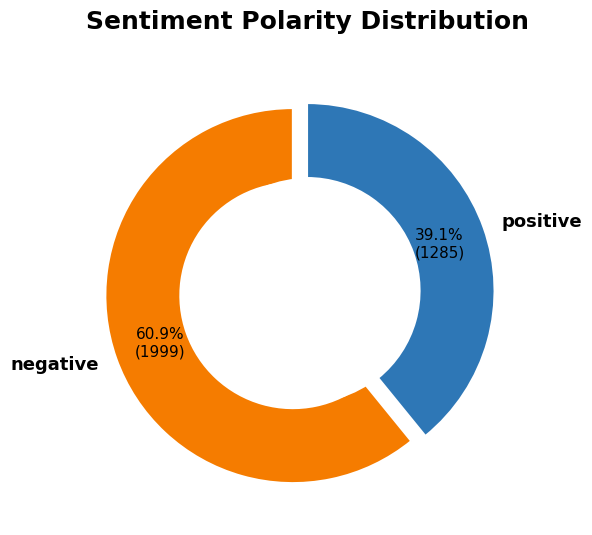

In [ ]:
# menghitung jumlah masing-masing kategori polaritas
polarity_counts = clean_df['polarity'].value_counts()
labels = polarity_counts.index
sizes = polarity_counts.values

# mengurutkan data berdasarkan jumlah dari terbesar ke terkecil
sorted_data = sorted(zip(sizes, labels), reverse=True)
sizes, labels = zip(*sorted_data)

# menentukan warna tiap label sesuai mapping
color_map = {
    'positive': '#2E77B6',
    'negative': '#F57C00',
}
colors = [color_map.get(label, '#D3D3D3') for label in labels]

# memberi efek pada bagian dengan jumlah terbanyak agar lebih menonjol
explode = [0.08] + [0 for _ in range(len(labels) - 1)]

# menampilkan persen dan jumlah di dalam pie chart
def autopct_format(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return f"{pct:.1f}%\n({absolute})"

# membuat plot pie chart bergaya donat
fig, ax = plt.subplots(figsize=(6, 6), facecolor='white')
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    explode=explode,
    colors=colors,
    startangle=90,
    autopct=lambda pct: autopct_format(pct, sizes),
    pctdistance=0.75,
    textprops={'fontsize': 13, 'color': 'black'},
    wedgeprops={'linewidth': 1.5, 'edgecolor': 'white', 'width': 0.4}
)

# menambahkan lingkaran putih di tengah untuk efek donat
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)

# judul grafik
ax.set_title('Sentiment Polarity Distribution', fontsize=18, fontweight='bold', pad=20)

# styling teks label dan nilai persen
for text in texts:
    text.set_fontsize(13)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_fontsize(11)

# mengatur layout agar tidak terpotong
plt.tight_layout()

# menampilkan grafik
plt.show()


**Interpretasi:**

- Mayoritas tweet (60.9%) mengandung sentimen negatif. Hanya sekitar (39.1%) tweet yang mengandung sentimen positif.


# **Explorasi Label**

In [ ]:
# mengubah pengaturan tampilan agar kolom dapat menampilkan hingga 3000 karakter
pd.set_option('display.max_colwidth', 3000)

# menyaring ulasan dengan polaritas positif dan memilih kolom yang dibutuhkan
positive_tweets = (
    clean_df[clean_df['polarity'] == 'positive']
    [['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
    .sort_values(by='polarity_score', ascending=False)
    .reset_index(drop=True)
)

# mengatur ulang indeks agar dimulai dari 1
positive_tweets.index = positive_tweets.index + 1


In [ ]:
# mengubah pengaturan tampilan agar kolom dapat menampilkan hingga 3000 karakter
pd.set_option('display.max_colwidth', 3000)

# enyaring ulasan negatif dengan skor polaritas terendah dan memilih kolom yang dibutuhkan
negative_tweets = (
    clean_df[clean_df['polarity'] == 'negative']
    [['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
    .sort_values(by='polarity_score', ascending=True)
    .reset_index(drop=True)
)

# mengatur ulang indeks agar dimulai dari 1
negative_tweets.index = negative_tweets.index + 1

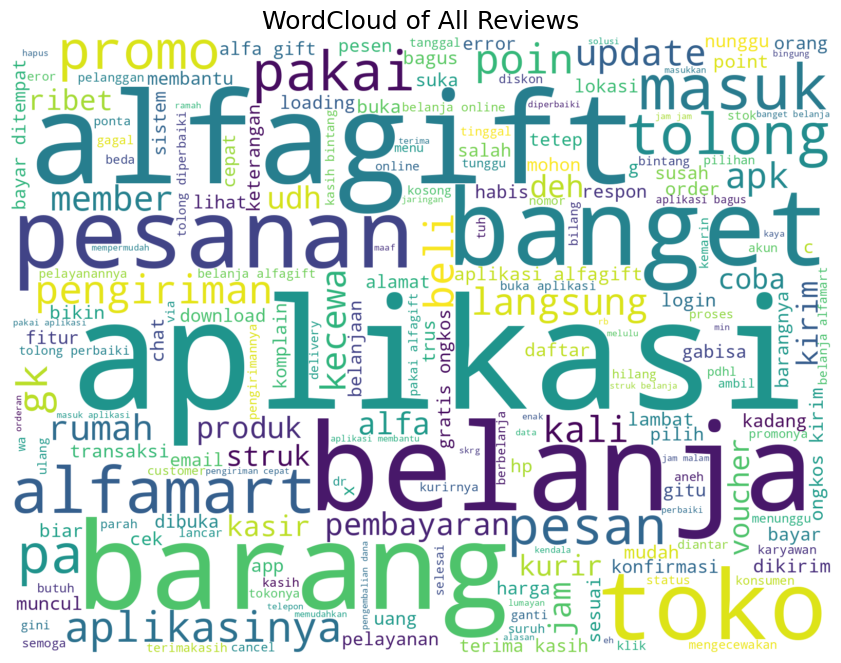

In [ ]:
# menggabungkan semua kata dari kolom 'text_stopword' menjadi satu string
list_words = ' '.join([' '.join(tweet) for tweet in clean_df['text_stopword']])

# membuat dan menampilkan WordCloud dengan kualitas HD
wordcloud = WordCloud(
    width=1600,
    height=1200,
    background_color='white',
    colormap='viridis'
).generate(list_words)  # menggunakan 'list_words' sebagai input

# menampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of All Reviews", fontsize=18)

# menampilkan plot
plt.show()


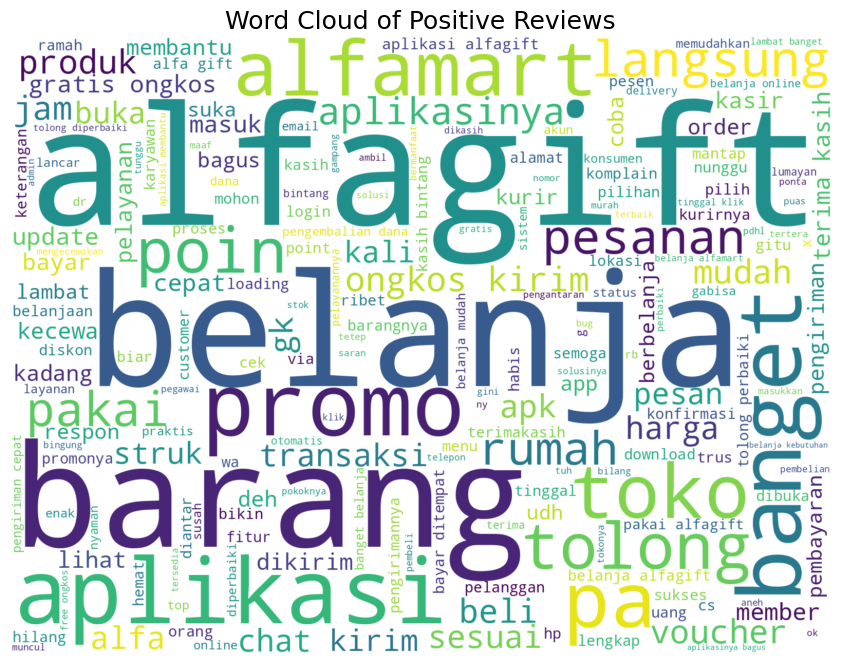

In [ ]:
# menggabungkan semua kata dari ulasan positif
list_words_positive = ' '.join([' '.join(tweet) for tweet in positive_tweets['text_stopword']])

# membuat dan menampilkan WordCloud untuk ulasan positif
wordcloud_positive = WordCloud(
    width=1600,
    height=1200,
    background_color='white',
    colormap='viridis'
).generate(list_words_positive)

# menampilkan WordCloud untuk ulasan positif
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Reviews", fontsize=18)

# menampilkan plot
plt.show()


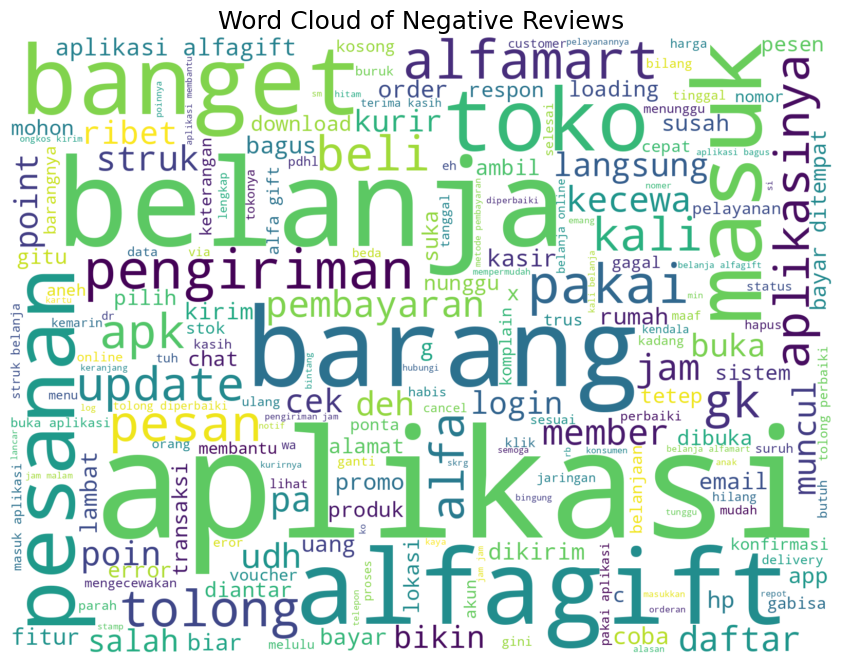

In [ ]:
# menggabungkan semua kata dari ulasan negatif
list_words_negative = ' '.join([' '.join(tweet) for tweet in negative_tweets['text_stopword']])

# membuat dan menampilkan WordCloud untuk ulasan negatif
wordcloud_negative = WordCloud(
    width=1600,
    height=1200,
    background_color='white',
    colormap='viridis'
).generate(list_words_negative)

# menampilkan WordCloud untuk ulasan negatif
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Reviews", fontsize=18)

# menampilkan plot
plt.show()


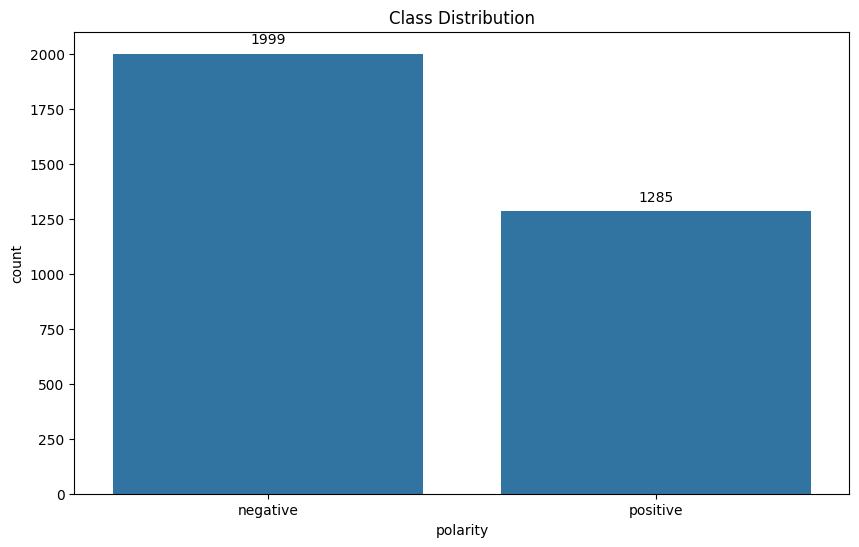

In [ ]:
# mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# membuat plot batang yang menunjukkan distribusi jumlah ulasan untuk setiap kelas polaritas
sns.countplot(x='polarity', data=clean_df)

# menambahkan judul pada plot
plt.title('Class Distribution')

# Menambahkan angka di atas setiap bar untuk menunjukkan jumlah
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 10),
                       textcoords='offset points')

# menampilkan plot
plt.show()


**Interpretasi:**
- Terjadi inbalance data, kelas negative lebih dominan (61%) dibandingkan kelas positive (39%)
- Model cenderung bisa lebih akurat terhadap kelas negative, tapi kurang performa pada kelas positive

**Mengatasi Inbalance Data dengan Oversampling**

In [ ]:
from sklearn.utils import resample

# membuat DataFrame baru dengan kolom yang diperlukan
df = clean_df[['text_akhir', 'score']].copy()
df.rename(columns={'score': 'polarity'}, inplace=True)

# mengasumsikan nilai polaritas asli adalah 1 dan 5 (atau nilai lainnya untuk positif)
df['polarity'] = df['polarity'].apply(lambda x: 'positive' if x > 3 else 'negative')

# memisahkan kelas mayoritas dan kelas minoritas
df_majority = df[df['polarity'] == 'negative']
df_minority = df[df['polarity'] == 'positive']

# mengecek apakah df_minority atau df_majority kosong
if len(df_minority) == 0 or len(df_majority) == 0:
    print("Warning: One of the classes is empty. Resampling might not be effective.")
    # jika salah satu kelas kosong, beri peringatan dan bisa menangani kelas yang kosong atau melewati proses resampling

else:
    # melakukan oversampling pada kelas minoritas
    df_minority_upsampled = resample(df_minority,
                                     replace=True,
                                     n_samples=len(df_majority),  # menyamakan jumlah dengan kelas mayoritas
                                     random_state=42)

    # menggabungkan dataset mayoritas dan minoritas yang sudah di-upsample
    df_balanced = pd.concat([df_majority, df_minority_upsampled])

    # mengacak data
    df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

    # mengecek distribusi kelas setelah oversampling
    print(df_balanced['polarity'].value_counts())

polarity
negative    2471
positive    2471
Name: count, dtype: int64


Setelah dilakukan oversampling, jumlah data pada kedua kelas berhasil diseimbangkan. Oversampling dilakukan dengan menambahkan data baru ke kelas minoritas (positive) agar jumlahnya sama dengan kelas mayoritas.

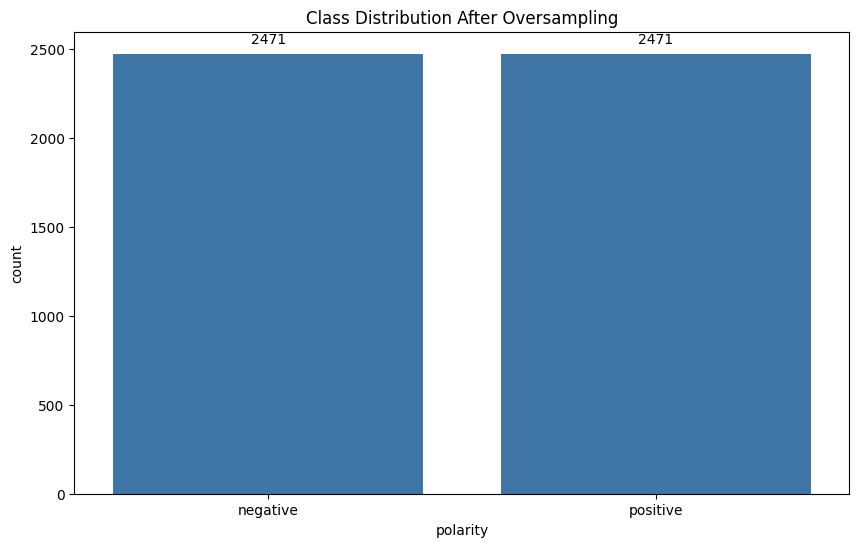

In [ ]:
# mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# membuat plot distribusi kelas dari df_balanced dengan warna biru yang diinginkan
sns.countplot(x='polarity', data=df_balanced, color='#2E77B6')

# menambahkan judul dalam bahasa Inggris
plt.title('Class Distribution After Oversampling')

# menambahkan angka di atas setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 10),
                       textcoords='offset points')

# menampilkan plot
plt.show()


**Interpretasi:**

Grafik ini menunjukkan bahwa jumlah data pada masing-masing kelas sentimen "negative" dan "positive"  adalah seimbang, masing-masing sebanyak 2.471 data setelah dilakukan oversampling.

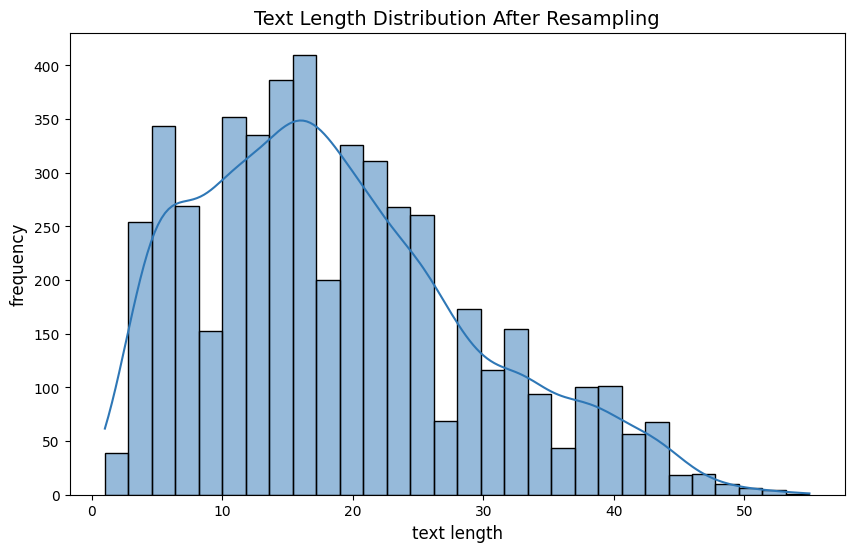

In [ ]:
# menambahkan kolom 'text_length' yang berisi panjang teks setelah dipisahkan menjadi kata
df_balanced['text_length'] = df_balanced['text_akhir'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# menentukan ukuran gambar untuk plot
plt.figure(figsize=(10, 6))

# membuat histogram dengan KDE untuk visualisasi distribusi panjang teks
sns.histplot(df_balanced['text_length'], kde=True, color='#2E77B6', bins=30)

# membuat judul dan label
plt.title('Text Length Distribution After Resampling', fontsize=14)
plt.xlabel('text length', fontsize=12)
plt.ylabel('frequency', fontsize=12)

# menampilkan plot
plt.show()

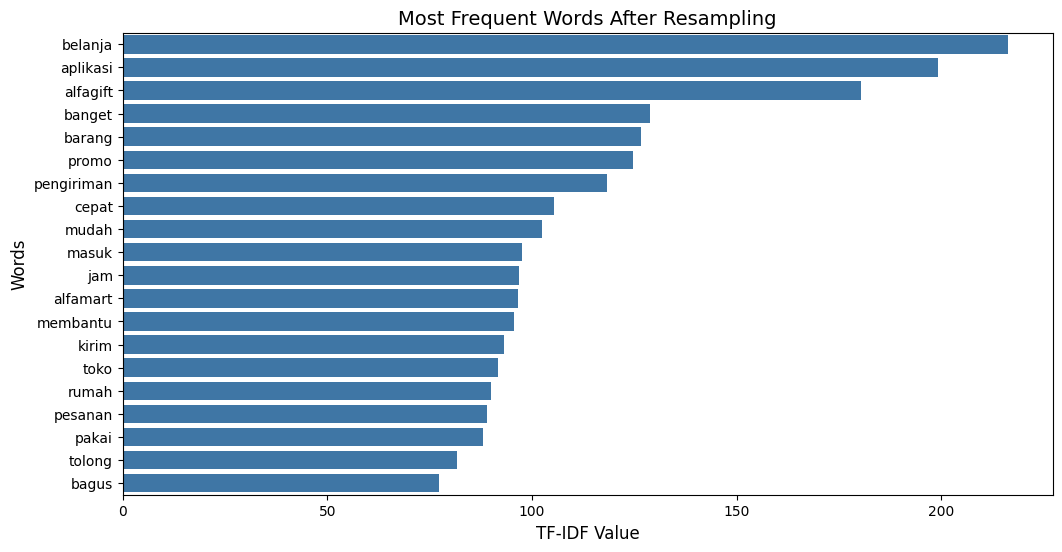

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# memastikan teks dalam bentuk string (menggabungkan list jika perlu)
df_balanced['text_akhir'] = df_balanced['text_akhir'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# inisialisasi TfidfVectorizer dan hilangkan stopwords Bahasa Inggris
vectorizer = TfidfVectorizer(stop_words='english')

# transformasi teks menjadi matriks TF-IDF
X_tfidf = vectorizer.fit_transform(df_balanced['text_akhir'])

# konversi matriks TF-IDF ke DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# menjumlahkan nilai TF-IDF dari setiap kata (total dari semua dokumen)
tfidf_sum = tfidf_df.sum().reset_index()
tfidf_sum.columns = ['word', 'jumlah']

# mengambil 20 kata dengan skor TF-IDF tertinggi
top_words = tfidf_sum.sort_values(by='jumlah', ascending=False).head(20)

#membuat plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_words, x='jumlah', y='word', color='#2E77B6')
plt.title('Most Frequent Words After Resampling', fontsize=14)
plt.xlabel('TF-IDF Value', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.show()

**Interpretasi:**

- Kata "belanja" adalah yang paling sering muncul, dengan frekuensi lebih dari 200 kali.
- Pengguna banyak membahas pengalaman menggunakan aplikasi, seperti login, belanja, pengiriman, dan pembayaran, yang tercermin dari kata-kata seperti "aplikasi", "masuk", "pengiriman", "pembayaran", "kirim", "pesanan", dan "buka".
- Kata seperti "tolong", "banget" bisa mengindikasikan keluhan, permintaan bantuan, atau ekspresi emosi.

# **Data Splitting**

In [ ]:
clean_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity
0,cf8b185b-da1f-4bf3-8a1f-4ad8fd6af1bf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"aku suka sama aplikasi ini tapi kok setiap kurirnya telepon suaranya ga ada ya? bukan kurirnya yang bermasalah, tapi aplikasinya. ada fitur telepon tapi ketika melakukan komunikasi via telepon suaranya tidak muncul. untuk maps juga suka ga sesuai titiknya, untungnya bisa hyperlink gmaps biar lokasi lebih tepat. itu aja sih keluhanku, tolong diperbaiki ya",4,1,4.37.0,2025-04-10 06:12:22,"Terima kasih atas kritik dan saran nya ya Kak, informasi tersebut akan Shalma berikan kepada pihak terkait untuk membantu meningkatkan pelayanan kepada Customer🙏 ^js",2025-04-10 11:45:41,4.37.0,aku suka sama aplikasi ini tapi kok setiap kurirnya telepon suaranya ga ada ya bukan kurirnya yang bermasalah tapi aplikasinya ada fitur telepon tapi ketika melakukan komunikasi via telepon suaranya tidak muncul untuk maps juga suka ga sesuai titiknya untungnya bisa hyperlink gmaps biar lokasi lebih tepat itu aja sih keluhanku tolong diperbaiki ya,aku suka sama aplikasi ini tapi kok setiap kurirnya telepon suaranya ga ada ya bukan kurirnya yang bermasalah tapi aplikasinya ada fitur telepon tapi ketika melakukan komunikasi via telepon suaranya tidak muncul untuk maps juga suka ga sesuai titiknya untungnya bisa hyperlink gmaps biar lokasi lebih tepat itu aja sih keluhanku tolong diperbaiki ya,aku suka sama aplikasi ini tapi kok setiap kurirnya telepon suaranya ga ada iya bukan kurirnya yang bermasalah tapi aplikasinya ada fitur telepon tapi ketika melakukan komunikasi via telepon suaranya tidak muncul untuk maps juga suka ga sesuai titiknya untungnya bisa hyperlink gmaps biar lokasi lebih tepat itu saja sih keluhanku tolong diperbaiki iya,"[aku, suka, sama, aplikasi, ini, tapi, kok, setiap, kurirnya, telepon, suaranya, ga, ada, iya, bukan, kurirnya, yang, bermasalah, tapi, aplikasinya, ada, fitur, telepon, tapi, ketika, melakukan, komunikasi, via, telepon, suaranya, tidak, muncul, untuk, maps, juga, suka, ga, sesuai, titiknya, untungnya, bisa, hyperlink, gmaps, biar, lokasi, lebih, tepat, itu, saja, sih, keluhanku, tolong, diperbaiki, iya]","[suka, aplikasi, kurirnya, telepon, suaranya, kurirnya, bermasalah, aplikasinya, fitur, telepon, komunikasi, via, telepon, suaranya, muncul, maps, suka, sesuai, titiknya, untungnya, hyperlink, gmaps, biar, lokasi, keluhanku, tolong, diperbaiki]",suka aplikasi kurirnya telepon suaranya kurirnya bermasalah aplikasinya fitur telepon komunikasi via telepon suaranya muncul maps suka sesuai titiknya untungnya hyperlink gmaps biar lokasi keluhanku tolong diperbaiki,-2,negative
1,3c773524-178a-48f2-9ed1-971f1f7ac213,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"pengiriman terlalu lama di salah satu cabang, udah pilih layanan pengiriman maksimal 1 jam tapi ga pernah tepat waktu, di chat tokonya very slow respon, malah pernah diantar jam 11 malam saat org udh tidur, saat minta pengembalian dana mekanisme nya ga jelas, status pengembalian dana diajukan terus ga berubah2, sangat tidak fleksibel padahal suka bgt belanja di alfamart tp krn sistem alfagift nya begini jd kecewa",1,38,4.37.0,2025-04-07 08:00:49,"Hai, Kak. Maaf banget ya buat kendalanya. Biar Shalma bantu cek kendala Kakak, mohon kirimkan screenshoot detail kendalanya melalui DM Instagram @Alfagift dengan memberikan kode #2407234. Shalma akan bantu sebaik mungkin ya Kak. Terima kasih 😊️^hl",2025-04-07 08:32:12,4.37.0,pengiriman terlalu lama di salah satu cabang udah pilih layanan pengiriman maksimal jam tapi ga pernah tepat waktu di chat tokonya very slow respon malah pernah dia

In [ ]:
# Gabungkan list token jadi string, lalu filter yang tidak kosong
X = df_balanced['text_akhir']
y = df_balanced['polarity']

# **Modelling**

# SVM - TF IDF

In [ ]:
# mengimpor library yang dibutuhkan
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [ ]:
# membagi data menjadi fitur dan target
X = df_balanced['text_akhir']
y = df_balanced['polarity']

In [ ]:
# membagi data menjadi train dan test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# membuat pipeline dengan TF-IDF dan SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=2000, ngram_range=(1,2))),
    ('svm', SVC())
])

# parameter grid untuk GridSearchCV, fokus pada parameter regularisasi dan tipe kernel
param_grid = {
    'svm__C': [0.1, 0.25, 0.5],
    'svm__kernel': ['linear', 'rbf'],
}

# mencari kombinasi parameter terbaik
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# melatih model dengan data training
grid_search.fit(X_train, y_train)

# menampilkan parameter terbaik yang ditemukan selama pencarian
print("Best parameters:", grid_search.best_params_)

# menggunakan model terbaik untuk memprediksi data training dan testing
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)

# menghitung akurasi pada data training dan testing
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# menampilkan hasil akurasi
print(f'SVM - accuracy_train: {accuracy_train}')
print(f'SVM - accuracy_test: {accuracy_test}')


Best parameters: {'svm__C': 0.5, 'svm__kernel': 'rbf'}
SVM - accuracy_train: 0.9759676195294713
SVM - accuracy_test: 0.9433771486349848


Interpretasi:
- Model SVM dengan parameter C= 0.5 dan kernel linear menunjukkan performa yang sangat baik. Meskipun ada sedikit penurunan akurasi antara pelatihan dan pengujian, perbedaan tersebut tidak terlalu signifikan.
- Model tidak overfitting dan mampu menggeneralisasi dengan baik.

- **Akurasi pada Data Pelatihan ->** 97,6% (model sangat baik dalam mempelajari data pelatihan).
- **Akurasi pada Data Pengujian ->** 94,34% (model tetap menggeneralisasi dengan baik pada data yang tidak terlihat sebelumnya).



# Random Forest - Word2Vec

In [ ]:
# mengimpor library yang dibutuhkan
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

In [ ]:
# tokenisasi sederhana (pisahkan kata berdasarkan spasi)
df_balanced['tokens'] = df_balanced['text_akhir'].apply(lambda x: x.split())

# menyiapkan data
X_tokens = df_balanced['tokens']
y = df_balanced['polarity']

In [ ]:
# melatih model Word2Vec
w2v_model = Word2Vec(sentences=X_tokens, vector_size=100, window=5, min_count=1, workers=4, sg=1)  # sg=1: Skip-gram

In [ ]:
# menghitung rata-rata vektor Word2Vec untuk setiap dokumen
def document_vector(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(w2v_model.vector_size)

# membuat representasi vektor untuk seluruh data
X_vectors = np.array([document_vector(tokens) for tokens in tqdm(X_tokens)])


100%|██████████| 4942/4942 [00:00<00:00, 9892.74it/s]


In [ ]:
# membagi data menjadi train dan test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# membuat model Random Forest dengan parameter regularisasi
rf_model = RandomForestClassifier(
    n_estimators=120,
    max_depth=12,
    min_samples_split=8,
    min_samples_leaf=4,
    random_state=42
)

# melatih model menggunakan data pelatihan
rf_model.fit(X_train, y_train)

# melakukan prediksi pada data pelatihan
y_pred_train = rf_model.predict(X_train)

# melakukan prediksi pada data pengujian
y_pred_test = rf_model.predict(X_test)

# menghitung akurasi model pada data pelatihan dan data uji
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# menampilkan hasil akurasi model
print(f'RF - accuracy_train: {accuracy_train}')
print(f'RF - accuracy_test: {accuracy_test}')

RF - accuracy_train: 0.9797622059195548
RF - accuracy_test: 0.9322548028311426


**Interpretasi:**
- Model tidak overfitting dan model mampu menggeneralisasi dengan baik pada data yang belum dikenali.
- **Akurasi pada Data Pelatihan ->** 97.98% (model sangat baik dalam mengenali pola pada data pelatihan).
- **Akurasi pada Data Pengujian ->** 93.22% (model juga memiliki kinerja tinggi pada data baru yang belum pernah dilihat sebelumnya).


In [ ]:
# menampilkan hasil klasifikasi
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

    negative       0.91      0.96      0.93       495
    positive       0.96      0.90      0.93       494

    accuracy                           0.93       989
   macro avg       0.93      0.93      0.93       989
weighted avg       0.93      0.93      0.93       989



Akurasi 93% yang berarti model mampu mengklasifikasikan 93% data dengan benar.

# Random Forest - TF IDF

In [ ]:
# membagi data menjadi fitur dan target
X = df_balanced['text_akhir']
y = df_balanced['polarity']

In [ ]:
# membagi data menjadi train dan test (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# membuat pipeline yang terdiri dari TF-IDF dan Random Forest Classifier
pipeline = Pipeline([

    # mengubah teks menjadi representasi numerik menggunakan TF-IDF
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=3000, ngram_range=(1, 2))),
    ('rf', RandomForestClassifier(random_state=42))      # klasifikasi
])

# menentukan hyperparameter untuk Random Forest melalui GridSearchCV
param_grid = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2],
}

# melakukan pencarian GridSearchCV dengan menggunakan 3-fold cross-validation untuk efisiensi waktu
# mencoba semua kombinasi parameter dan memilih yang terbaik berdasarkan akurasi
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='accuracy')

# melatih model dengan data training menggunakan GridSearchCV
grid_search.fit(X_train, y_train)

# evaluasi model hasil terbaik berdasarkan GridSearchCV
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# menghitung akurasi pada data training dan testing
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# menampilkan parameter terbaik dan akurasi model pada data training dan testing
print("Best parameters:", grid_search.best_params_)
print(f"RF - accuracy_train: {accuracy_train}")
print(f"RF - accuracy_test: {accuracy_test}")

Best parameters: {'rf__max_depth': 20, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
RF - accuracy_train: 0.9150043365134432
RF - accuracy_test: 0.8752528658125421


**Interpretasi:**
- Akurasi pada data training sangat tinggi (91.5%), menunjukkan model belajar dengan baik.
- Akurasi pada data testing sedikit lebih rendah (87.5%), namun masih cukup baik.
- Tidak ada overfitting parah, dan model tidak underfitting.

In [ ]:
# menampilkan hasil klasifikasi
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.94      0.88       742
    positive       0.93      0.81      0.87       741

    accuracy                           0.88      1483
   macro avg       0.88      0.88      0.87      1483
weighted avg       0.88      0.88      0.87      1483



Model memiliki akurasi keseluruhan 88%, yang menunjukkan bahwa prediksi model sebagian besar benar.

**Keseluruhan Hasil Akurasi**

In [ ]:
# membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['SVM (Best)', 'Random Forest (Best)', 'Random Forest (Default)'],
    'Accuracy Train': [0.9759676195294713, 0.9797622059195548, 0.9150043365134432],  # akurasi model SVM dan Random Forest pada data training
    'Accuracy Test': [0.9433771486349848, 0.9322548028311426, 0.8752528658125421]  # akurasi model SVM dan Random Forest pada data testing
})

# menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)


                     Model  Accuracy Test
0               SVM (Best)       0.943377
1     Random Forest (Best)       0.932255
2  Random Forest (Default)       0.875253


# **Interpretasi**

1. **SVM (Best) -> 94.34%** **:** Model SVM dengan fitur TF IDF parameter terbaik (C=0.5, kernel=rbf) memberikan hasil terbaik di antara model-model lain. Akurasi pada data pengujian mencapai 94.34%, yang menunjukkan SVM sangat efektif dalam mengklasifikasikan data dengan tepat.

2. **Random Forest (Best) -> 93.23% :**
Model Random Forest dengan fitur Word2Vec memiliki akurasi 93.23%. Meskipun sedikit lebih rendah dibandingkan SVM, hasil ini masih sangat baik dan menunjukkan bahwa model ini bekerja dengan cukup baik dalam mengklasifikasikan data.

3. **Random Forest (Default) -> 87.53% :** Model Random Forest yang menggunakan TF IDF memberikan hasil yang lebih rendah dengan akurasi 87.53% pada data pengujian. Ini menunjukkan bahwa tidak menghasilkan performa sebaik model yang sudah dituning.

# **Analisa Sentimen Kalimat Baru**

In [ ]:
# mengimpor library yang dibutuhkan
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# mendefinisikan tfidf dan fit pada data pelatihan
tfidf = TfidfVectorizer(stop_words='english', max_features=3000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)

# melatih model LogisticRegression pada data pelatihan
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train_tfidf, y_train)

# input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

# menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")


Masukkan kalimat baru: kurir sangat cepat
Sentimen kalimat baru adalah POSITIF.


In [ ]:
# mendefinisikan tfidf dan fit pada data pelatihan
tfidf = TfidfVectorizer(stop_words='english', max_features=3000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)

# melatih model LogisticRegression pada data pelatihan
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train_tfidf, y_train)

# input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

# menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")


Masukkan kalimat baru: pelayanan sangat lambat
Sentimen kalimat baru adalah NEGATIF.
